# INFO 2950 - Project Phase IV
---

By: David Fleurantin (djf252) and Meredith Hu (mmh264)
</br>
GitHub: https://github.com/DavidFleurantin/INFO-2950-Final-Project
</br>
Google Drive Link: https://drive.google.com/drive/folders/1iBHVGOBGvDMe7iT7gU4-bCawfUNaYZwe?usp=sharing

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from IPython.display import Image
from IPython.core.display import HTML 
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.linear_model import LinearRegression
import seaborn as sns
Image(url= "https://cdn.shopify.com/s/files/1/0072/7315/2579/articles/wallstreet_blog_grande.jpg?v=1598894414")

## Introduction 

---

A short squeeze of GameStop's (GME), an American video game retailer, occurred during January 2021. Approximately 140 percent of GameStop's public float had been sold short, and the rush to buy shares to cover those positions as the price rose caused it to rise even farther. Major hedge funds and other large short sellers experienced large and swift financial losses at the price of GME spiraled out of control. The short squeeze was initially triggered by members of the the Reddit subreddit [r/wallstreetbets](https://www.reddit.com/r/wallstreetbets/). On January 28th, the short squeeze caused GameStop's stock price to reach a value of oven opening value of US \\$500 per share, nearly 30 times the \\$17.25 valuation at the beginning of the month. 

The purpose of our project was to determine the degree of influence that r/wallstreetbets had upon GME's increasing stock price. To answer this question, we examined the frequency of postings made on r/wallstreetbets during 30 minute intervals that correspond with GME stock data also reported in 30 minute intervals. We trained two linear models that predicted the closing price given the frequency of all Reddit posts and the frequency of only Reddit posts deemed relevant after a simple Boolean search of post titles. Ultimately, we found no relationship between the frequency of Reddit posts on r/wallstreetbets and GameStop stock price.

---
## Data Description

**1. For what purpose was the dataset created? Was there a specific task in mind? Was there a specific gap that needed to be filled?**
   - Reddit data - was created to capture the sentiments of r/wallstreetbets in their posts during the meteoric rise of GME stock. WallStreetBets (r/wallstreetbets, also known as WSB), is a subreddit where participants discuss stock and option trading. It has become notable for its profane nature and allegations of users manipulating securities. Recently the community became mainstream again with its interest on GameStop shares.
   - GME stock data - was created out of a need to source intraday stock data.
    
**2. Who created the dataset and on behalf of which entity?**
   - Reddit - Data Scientist and Kaggle contributor, [Gabriel Preda](https://www.kaggle.com/gpreda), to satisfy a research need 
   - GME - [Alpha Vantage](https://www.alphavantage.co/#about)

**3. What do the instances that comprise the dataset represent?**
   - Reddit - the data contains the 'title', 'score', 'url', 'number of comments', 'time of creation', 'post body', 'timestamp', and associated 'post id'. All of these instances serve to identify exactly 1 r/wallstreetbets post by a user at a particular time.
   - GME - the data records'open price' 'high price' 'low price' 'close price' 'volume traded' over a 30min 'time' interval. 
    
**4. How many instances are there in total?**
   - Reddit - There are 42552 total posts captured
   - GME - There are 1372 total 30min intervals of stock prices recorded.
    

**5. How was the data associated with each instance acquired? Was the data directly observable, reported by subjects, or indirectly inferred/derived from other data? If data was reported by subjects or indirectly inferred/derived from other data, was the data validated/verified?**
   - Reddit - the data was downloaded from https://www.reddit.com/r/wallstreetbets/ using praw (The Python Reddit API Wrapper) by the dataset's creator.
   - GME - Alpha Vantage partnered with major exchanges and institutions around the world to become a leading provider of stock APIs as well as forex (FX) and cryptocurrency data feeds.
 
**6. Does the dataset contain all possible instances or is it a sample of instances from a larger set? If thedataset is a sample, then what is the larger set? Is the sample representative of the larger set?**
   - Reddit - the data det is any actively growing sample of all r/wallstreetbets posts from Jan. 28, 2021 to present. Around Jan. 28, r/wallstreetbets was at its peak in media attention and conicided with the peak of GME stock. The sample may not be representative of the larger set since post topics on Reddit are not static (i.e. what users post today may not mirror the topics that they will post about tommorrow).
   - GME - the data is part of the last two months of GME's stock activity. The sample may not be representative of the larger set since GME was a very volitale stock. For example GME was trading below 20 dollars a year ago.
    
**7. Over what timeframe was the data collected? Does this timeframe match the creation timeframe of the data associated with the instances?**
   - Reddit - From January 28, 2021 to present (March 19, 2021)
   - GME - From Jan 19, 2021 market open to present (March 19, 2021) market close.
   
**8. What data does each instance consist of? “Raw” data or features? In either case, please provide a description.**
   - Reddit - Raw user post data
   - GME - Raw stock price data

**9. Is any information missing from individual instances? If so, please provide a description, explaining why this information is missing.**
   - Reddit - some values in the 'body' column were NaN. This was done by the creator of the data set to indicate that the post had no post body.

**10. Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety?**
   - Reddit - the data contains a copious amount of harsh language/emojis,which is used in a joking fashion, inside post titles and post bodies. The posts were not filtered in order to preserve the nature of r/wallstreetbets.
    
**11. Does the dataset relate to people? If not, you may skip the remaining questions in this section.**
   - Reddit - the data captures the direct posts of Reddit (a public social media platform) users.

**12. Is it possible to identify individuals, either directly or indirectly from the dataset?**
   - Reddit - it is not possible to identify users by their posts unless they choose to identify themselves in their post (self-doxxing). The usernames of each user are not provided in the dataset. However, the url of each post is identifed and can be used to find to the respective post on Reddit.


**14. Were the individuals in question notified about the data collection? Did the individuals in question consent to the collection and use of their data?**
   - Reddit - No. Reddit is a public platform where all posts are publicly visible. When r/wallstreetbets recieved increased media attention and its posts were documented by the media, users of the subreddit were either filled with pride/bravado or anger due to perceived misrepresentation of their posts. At points even CNBC (financial news) read r/wallstreetbets posts during TV broadcasts.

**15. Was any preprocessing/cleaning/labeling of the data done?.**
   - Reddit - The 'created', 'url', and 'id' columns would be useless in our planned analysis, so we removed them. Reddit gives users the option to provide a body to whatever topic that they post.The 'body' column is not much of particular direct interest and would. However we felt that it was necessary to capture the length of each post body if it was provided using numerical values. For example, a that is 1000 characters long would have a 'body' value of 1000 while a post with no body (NaN) would have a 'body' value of 0. The timestamp column was converted into a datetime object from a string inorder to enable easier comparisons.
   - GME - The indexing of the the data that was produced by the api was modified to be more in uniform with CS conventions. The API that was used was only able to generate a dataframe in 1 month time intervals. Since we wanted to examine 2 months, we generated two dataframes and merged the two into one dataframe while maintaing proper sorting by time. The time column was converted into a datetime object from a string inorder to enable easier comparisons.
    
**16. Is the software used to preprocess/clean/label the instances available? If so, please provide a link or other access point.**
   - Reddit - the dataset creator utilized [praw](https://praw.readthedocs.io/en/latest/) to scrape r/wallstreetbets posts
   - GME - [Alpha Vantage API](https://www.alphavantage.co/documentation/) and the [Python API Wrapper](https://github.com/RomelTorres/alpha_vantage)

**17. Where can your raw source data be found, if applicable? Provide a link to the raw data.**
   - Both datasets can be found here (Make sure to use Cornell Account) -> https://drive.google.com/drive/folders/1afEt08iEISR9dxVcrv-lBQych2ZslX0d?usp=sharing


## Data Import
---

Data Cleaning and Curation steps have been excluded. Please refer to Appendix Section for for more details. 
</br>
Datasets can be found here: https://drive.google.com/drive/folders/1iBHVGOBGvDMe7iT7gU4-bCawfUNaYZwe?usp=sharing

#### r/wallstreetbets Posts and Metadata

In [2]:
## load Reddit (WSB) data
reddit_data = pd.read_csv("reddit_wsb_final.csv")
reddit_data.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,0.0,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,0.0,2021-01-28 21:32:10
2,Exit the system,0,47,1319.0,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,0.0,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,0.0,2021-01-28 21:26:56


#### r/wallstreetbets Posts and Metadata that mention GME/GameStop

In [3]:
## load Reddit (WSB) data with only posts relevant to Gamestop and GME
reddit_data_gme_only = pd.read_csv("reddit_data_gme_only_final.csv")
reddit_data_gme_only.head()

,title,score,comms_num,body,timestamp
1,Math Professor Scott Steiner says the numbers ...,110,23,0.0,2021-01-28 21:32:10
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,0.0,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,0.0,2021-01-28 21:26:56
8,Currently Holding AMC and NOK - Is it retarded...,200,161,0.0,2021-01-28 21:19:16
11,GME Premarket 🍁 Musk approved 🎮🛑💎✋,562,97,0.0,2021-01-28 21:17:28


#### Intraday GameStop (GME) Stock Data

In [4]:
## load Gamestop (GME Stock) data
gme_data = pd.read_csv("gme_data_final.csv")
gme_data.head()

,time,open,high,low,close,volume
0,2021-03-19 20:00:00,199.3100,199.40,198.5601,199.00,14316
1,2021-03-19 19:30:00,199.9800,199.99,199.2000,199.30,6403
2,2021-03-19 19:00:00,199.1000,200.00,199.0000,200.00,15086
3,2021-03-19 18:30:00,200.2400,200.29,199.0100,199.40,20833
4,2021-03-19 18:00:00,199.5972,200.40,199.5500,200.24,14931


Now let's plot the GME stock data over the two month interval. Our results should almost mirror the results of charts like this [here](https://www.tradingview.com/symbols/NYSE-GME/).

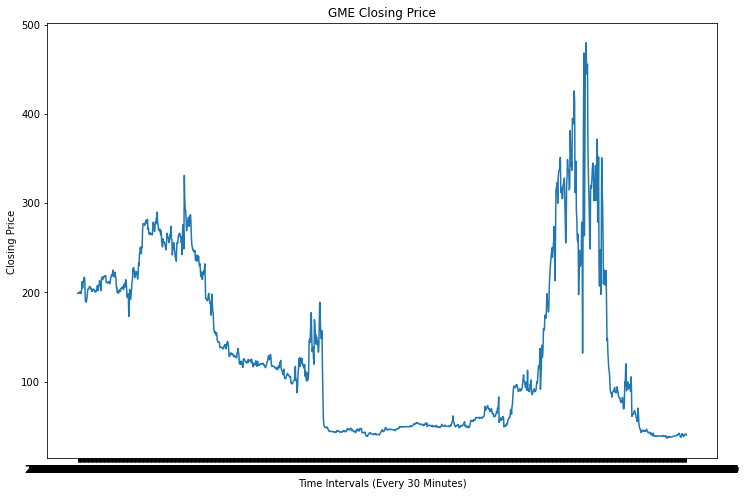

In [5]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.plot(gme_data['time'], gme_data['close'])
plt.xlabel('Time Intervals (Every 30 Minutes)')
plt.ylabel('Closing Price ')
plt.title('GME Closing Price')
plt.show()

---
## Preregistration Statement

We aim to provide an answer to the following three questions through data analysis and evaluation of statistical significance. 

#### 1. Does the frequency of WSB reddit posts during their corresponding GME stock price intervals correlate positevly with GME stock price?

#### 2. Does the freuqency/amount of posts that mention Gamestop/GME in the title correlate positively with stock price?

---
## Question 1: Data Analysis


#### 1. Does the frequency of WSB reddit posts during their corresponding GME stock price intervals correlate positevly with GME stock price?


In order to answer this question, we must count the number of posts that were made on reddit that fall within each 30 minute time interval in the GameStop stock dataset. 

First lets make sure that both respectives columns are converted to datetime objects

In [6]:
gme_data['time'] = pd.to_datetime(gme_data['time'], format = '%Y-%m-%d %H:%M:%S')
reddit_data['timestamp'] = pd.to_datetime(reddit_data['timestamp'], format = '%Y-%m-%d %H:%M:%S')

If you examine the reddit dataset, the `timestamp` column shows exactly when each post was posted. 

In [7]:
reddit_data.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,0.0,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,0.0,2021-01-28 21:32:10
2,Exit the system,0,47,1319.0,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,0.0,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,0.0,2021-01-28 21:26:56


We can normalize these timestamps by taking the 30 minute floor of each time. The function below allows us to do this.

In [8]:
def floor_dt(row):
    replace = (row['timestamp'].minute // 30)*30
    return row['timestamp'].replace(minute = replace, second=0, microsecond=0)

Next lets create a new column, `timestamp_rounded` for the reddit that holds each timestamp rounded down.

In [9]:
reddit_data['timestamp_rounded'] = reddit_data.apply(floor_dt, axis=1)

In [10]:
reddit_data.head()

,title,score,comms_num,body,timestamp,timestamp_rounded
0,"It's not about the money, it's about sending a...",55,6,0.0,2021-01-28 21:37:41,2021-01-28 21:30:00
1,Math Professor Scott Steiner says the numbers ...,110,23,0.0,2021-01-28 21:32:10,2021-01-28 21:30:00
2,Exit the system,0,47,1319.0,2021-01-28 21:30:35,2021-01-28 21:30:00
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,0.0,2021-01-28 21:28:57,2021-01-28 21:00:00
4,"Not to distract from GME, just thought our AMC...",71,156,0.0,2021-01-28 21:26:56,2021-01-28 21:00:00


Now we can count the number of times (frequency) each timestamp occured and assign that value to a dictionary. 

In [11]:
reddit_freq_dict = dict(reddit_data['timestamp_rounded'].value_counts())

Below is what the dictionary looks like.

In [12]:
for x in list(reddit_freq_dict)[0:4]:
    print ("key= {}, value= {} ".format(x,  reddit_freq_dict[x]))



key= 2021-01-29 01:00:00, value= 4799 
key= 2021-01-29 02:30:00, value= 2744 
key= 2021-01-29 01:30:00, value= 2451 
key= 2021-01-29 02:00:00, value= 2273 


Next lets create a new column, `reddit_frequency` in the gme data set that records the frequency of posts that match each timestamp.

In [13]:
gme_data['reddit_frequency'] = 0
for key, val in reddit_freq_dict.items():
    if key in gme_data['time'].values:
        idx = gme_data[gme_data['time']==key].index
        gme_data['reddit_frequency'][idx] = val
        
        
gme_data.head()

,time,open,high,low,close,volume,reddit_frequency
0,2021-03-19 20:00:00,199.3100,199.40,198.5601,199.00,14316,0
1,2021-03-19 19:30:00,199.9800,199.99,199.2000,199.30,6403,0
2,2021-03-19 19:00:00,199.1000,200.00,199.0000,200.00,15086,0
3,2021-03-19 18:30:00,200.2400,200.29,199.0100,199.40,20833,1
4,2021-03-19 18:00:00,199.5972,200.40,199.5500,200.24,14931,2


Now using `LinearRegression` in `sklearn.linear_model` lets train a model that predicts `close` given the frequency of reddit posts during that interval, `reddit_frequency`. The `close` cloumn records the closing price of GME stock after each interval.

In [14]:
##create a linear regression object
linear_model = LinearRegression() 

##fit it to data 
X =  gme_data[ ['reddit_frequency'] ]
linear_model.fit(X, gme_data['close']) 

#predict y
y_pred = linear_model.predict(X)
slope = linear_model.coef_[0]
r_2 = linear_model.score(X, gme_data['close'])
print("Predictor Variable - Reddit Post Frequency - : Regression Slope = {:.2f} - R^2 = {:.2f}".format(slope, r_2))

Predictor Variable - Reddit Post Frequency - : Regression Slope = 0.56 - R^2 = 0.01


#### Evaluation of Significance

In [15]:
r_2 = linear_model.score(X, gme_data['close'])
print("Predictor Variable - Reddit Post Frequency - : Regression Slope = {:.2f} - R^2 = {:.2f}".format(slope, r_2))

Predictor Variable - Reddit Post Frequency - : Regression Slope = 0.56 - R^2 = 0.01


As you increase by one reddit post, you can expect the price of GME to increase by almost .56 cents. Reddit post frequency appears to not be correlated at all with the change in closing price given the weak postive nature of the relationship. The $r^2$ score is 0.01 and it shows that our model doesn’t fit data very well because it cannot explain all the variance. 

Lets also take a look at the scatter plot.

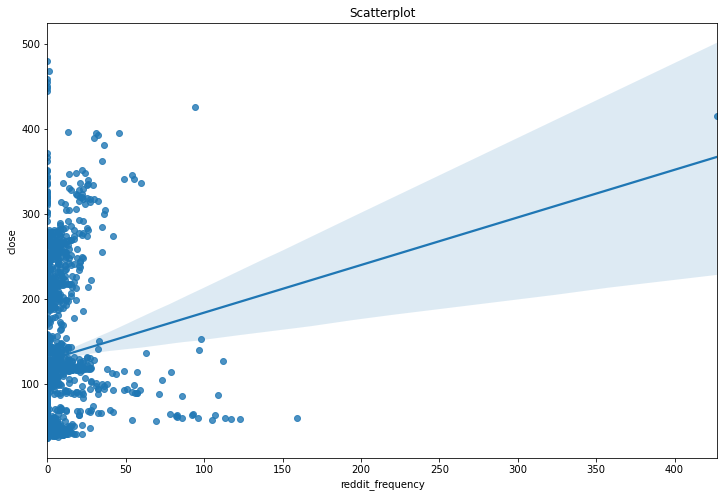

In [16]:
sns.regplot(x="reddit_frequency", y="close", data=gme_data)
plt.title('Scatterplot')
plt.show()

Lets remove what appears to be an outlier of 427 posts and recalculate the regression model.

In [17]:
gme_data['reddit_frequency'].describe()

count    1372.000000
mean        8.700437
std        18.970626
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max       427.000000
Name: reddit_frequency, dtype: float64

In [18]:
gme_data_rm_max = gme_data.copy()
gme_data_rm_max.drop(gme_data_rm_max.loc[gme_data_rm_max['reddit_frequency']==427].index, inplace=True)

In [19]:
gme_data_rm_max['reddit_frequency'].describe()

count    1371.000000
mean        8.395332
std        15.242558
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max       159.000000
Name: reddit_frequency, dtype: float64

Below is the new scatterplot that is created.

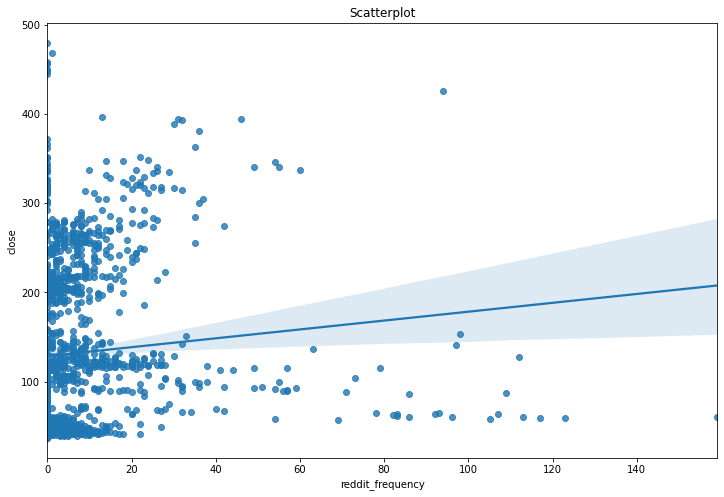

In [20]:
sns.regplot(x="reddit_frequency", y="close", data=gme_data_rm_max)
plt.title('Scatterplot')
plt.show()

In [21]:
##create a linear regression object
linear_model = LinearRegression() 

##fit it to data 
X =  gme_data_rm_max[ ['reddit_frequency'] ]
linear_model.fit(X, gme_data_rm_max['close']) 

#predict y
y_pred = linear_model.predict(X)
r_2 = linear_model.score(X, gme_data_rm_max['close'])
slope = linear_model.coef_[0]
print("Predictor Variable - Reddit Post Frequency - : Regression Slope = {:.2f} - R^2 = {:.2f}".format(slope, r_2))

Predictor Variable - Reddit Post Frequency - : Regression Slope = 0.50 - R^2 = 0.01


#### Evaluation of Significance

In [22]:
r_2 = linear_model.score(X, gme_data_rm_max['close'])
print("Predictor Variable - Reddit Post Frequency - : Regression Slope = {:.2f} - R^2 = {:.2f}".format(slope, r_2))

Predictor Variable - Reddit Post Frequency - : Regression Slope = 0.50 - R^2 = 0.01


Regardless of this change, Reddit post frequency appears to not be correlated at all with the change in closing price given the weak postive nature of the relationship.
As you increase by one reddit post, you can expect the price of GME to increase by almost .50 cents. Reddit post frequency appears to not be correlated at all with the change in closing price given the weak postive nature of the relationship. The $r^2$ score is 0.01 and it shows that our model doesn’t fit data very well because it cannot explain all the variance. 

---
## Question 2: Data Analysis

#### 2. Does the freuqency/amount of posts that mention Gamestop/GME in the title correlate positively with stock price?

Let's now replicate the analysis of question one but instead focus on the subset of reddit posts in our dataset that are relevant to GameStop and GME. 

The 'reddit_data_gme_only' records this subset of the reddit dataset. (See Appendix for more details about creation).

In [23]:
reddit_data_gme_only

,title,score,comms_num,body,timestamp
1,Math Professor Scott Steiner says the numbers ...,110,23,0.0,2021-01-28 21:32:10
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,0.0,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,0.0,2021-01-28 21:26:56
8,Currently Holding AMC and NOK - Is it retarded...,200,161,0.0,2021-01-28 21:19:16
11,GME Premarket 🍁 Musk approved 🎮🛑💎✋,562,97,0.0,2021-01-28 21:17:28
...,...,...,...,...,...
42524,GME Blood Money - Hedgies waited until stimmie...,75,19,126.0,2021-03-16 06:14:46
42527,GME update 3/15: honestly.... -$362K?? c'mon h...,6821,491,0.0,2021-03-16 06:12:34
42533,Hey Elon When you take us to the moon... Let‘s...,180,10,0.0,2021-03-16 06:00:15
42537,Did y’all really think the hedgies would just ...,19577,1725,3066.0,2021-03-16 05:50:51


First lets make sure that the timestamp column is converted to a datetime object

In [24]:
reddit_data_gme_only['timestamp'] = pd.to_datetime(reddit_data_gme_only['timestamp'], format = '%Y-%m-%d %H:%M:%S')

Lets again normalize these timestamps by taking the 30 minute floor of each time using the same function 'floor_dt' that was created in question 1.

In [25]:
reddit_data_gme_only['timestamp_rounded'] = reddit_data_gme_only.apply(floor_dt, axis=1)

In [26]:
reddit_data_gme_only.head()

,title,score,comms_num,body,timestamp,timestamp_rounded
1,Math Professor Scott Steiner says the numbers ...,110,23,0.0,2021-01-28 21:32:10,2021-01-28 21:30:00
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,0.0,2021-01-28 21:28:57,2021-01-28 21:00:00
4,"Not to distract from GME, just thought our AMC...",71,156,0.0,2021-01-28 21:26:56,2021-01-28 21:00:00
8,Currently Holding AMC and NOK - Is it retarded...,200,161,0.0,2021-01-28 21:19:16,2021-01-28 21:00:00
11,GME Premarket 🍁 Musk approved 🎮🛑💎✋,562,97,0.0,2021-01-28 21:17:28,2021-01-28 21:00:00


Now we can count the number of times (frequency) each timestamp occured and assign that value to a dictionary. 

In [27]:
reddit_gme_freq_dict = dict(reddit_data_gme_only['timestamp_rounded'].value_counts())

Below is what the dictionary looks like.

In [28]:
for x in list(reddit_gme_freq_dict)[0:4]:
    print ("key= {}, value= {} ".format(x,  reddit_gme_freq_dict[x]))

key= 2021-01-29 01:00:00, value= 795 
key= 2021-01-29 02:30:00, value= 593 
key= 2021-01-29 02:00:00, value= 500 
key= 2021-01-29 01:30:00, value= 498 


Next lets create a new column in the gme data set that records the frequency of posts that match each timestamp.

In [29]:
gme_data['reddit_gme_frequency'] = 0
for key, val in reddit_gme_freq_dict.items():
    if key in gme_data['time'].values:
        idx = gme_data[gme_data['time']==key].index
        gme_data['reddit_gme_frequency'][idx] = val
        
gme_data.head()

,time,open,high,low,close,volume,reddit_frequency,reddit_gme_frequency
0,2021-03-19 20:00:00,199.3100,199.40,198.5601,199.00,14316,0,0
1,2021-03-19 19:30:00,199.9800,199.99,199.2000,199.30,6403,0,0
2,2021-03-19 19:00:00,199.1000,200.00,199.0000,200.00,15086,0,0
3,2021-03-19 18:30:00,200.2400,200.29,199.0100,199.40,20833,1,0
4,2021-03-19 18:00:00,199.5972,200.40,199.5500,200.24,14931,2,0


We should expect the reddit_gme_frequency (since the subset is smaller) to be less than or equal to the reddit_frequency.

Now using `LinearRegression` in `sklearn.linear_model` lets train a model that predicts `close` given the frequency of reddit posts during that interval, `reddit_gme_frequency`. The `close` cloumn records the closing price of GME stock after each interval.

In [30]:
##create a linear regression object
linear_model = LinearRegression() 

##fit it to data 
X =  gme_data[ ['reddit_gme_frequency'] ]
linear_model.fit(X, gme_data['close']) 

#predict y
y_pred = linear_model.predict(X)
slope = linear_model.coef_[0]
r_2 = linear_model.score(X, gme_data['close'])
print("Predictor Variable - Reddit GME Post Frequency - : Regression Slope = {:.2f} - R^2 = {:.2f}".format(slope, r_2))

Predictor Variable - Reddit GME Post Frequency - : Regression Slope = 2.95 - R^2 = 0.02


#### Evaluation of Significance

In [31]:
r_2 = linear_model.score(X, gme_data['close'])
print("Predictor Variable - Reddit GME Post Frequency - : Regression Slope = {:.2f} - R^2 = {:.2f}".format(slope, r_2))

Predictor Variable - Reddit GME Post Frequency - : Regression Slope = 2.95 - R^2 = 0.02


As you increase by one GME related reddit post, you can expect the price of GME to increase by almost 2.95 dollars. GME Reddit post frequency appears to not be correlated at all with the change in closing price given the weak postive nature of the relationship. The $r^2$ score is 0.01 and it shows that our model doesn’t fit data very well because it cannot explain all the variance. 

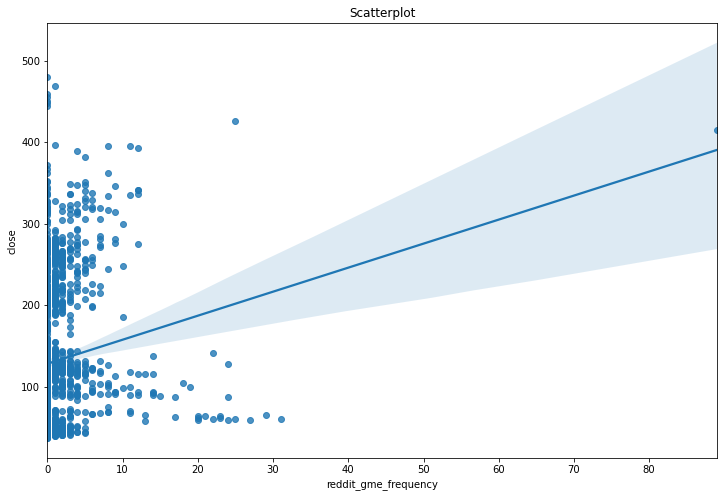

In [32]:
sns.regplot(x="reddit_gme_frequency", y="close", data=gme_data)
plt.title('Scatterplot')
plt.show()

Again lets remove the outlier post frequency and rerun the model.

In [33]:
gme_data['reddit_gme_frequency'].describe()

count    1372.000000
mean        1.731050
std         4.213119
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        89.000000
Name: reddit_gme_frequency, dtype: float64

In [34]:
gme_data_rm_max = gme_data.copy()
gme_data_rm_max.drop(gme_data_rm_max.loc[gme_data_rm_max['reddit_gme_frequency']==89].index, inplace=True)

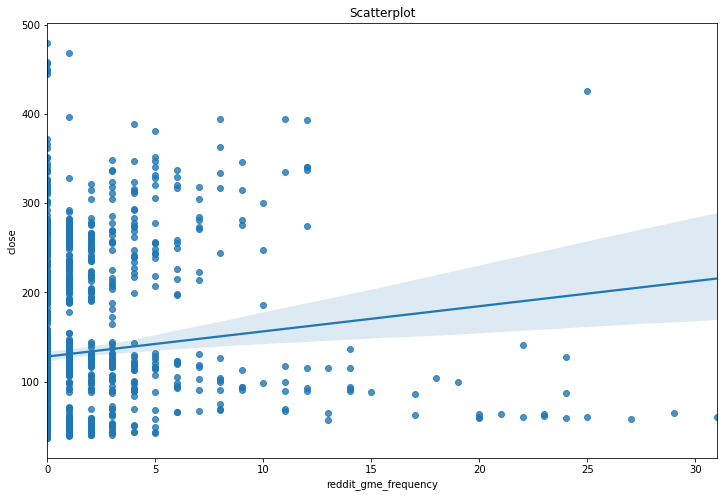

In [35]:
sns.regplot(x="reddit_gme_frequency", y="close", data=gme_data_rm_max)
plt.title('Scatterplot')
plt.show()

In [36]:
##create a linear regression object
linear_model = LinearRegression() 

##fit it to data 
X =  gme_data_rm_max[ ['reddit_gme_frequency'] ]
linear_model.fit(X, gme_data_rm_max['close']) 

#predict y
y_pred = linear_model.predict(X)
r_2 = linear_model.score(X, gme_data_rm_max['close'])
slope = linear_model.coef_[0]
print("Predictor Variable - Reddit GME Post Frequency - : Regression Slope = {:.2f} - R^2 = {:.2f}".format(slope, r_2))

Predictor Variable - Reddit GME Post Frequency - : Regression Slope = 2.82 - R^2 = 0.01


Regardless of this change, GME related Reddit post frequency appears to not be correlated at all with the change in closing price given the weak postive nature of the relationship. The $r^2$ score is 0.02 and it shows that our model doesn’t fit data very well because it cannot explain all the variance. 


#### Evaluation of Significance


In [37]:
r_2 = linear_model.score(X, gme_data_rm_max['close'])
print("Predictor Variable - Reddit GME Post Frequency - : Regression Slope = {:.2f} - R^2 = {:.2f}".format(slope, r_2))

Predictor Variable - Reddit GME Post Frequency - : Regression Slope = 2.82 - R^2 = 0.01


Regardless of this change, GME related Reddit post frequency appears to not be correlated at all with the change in closing price given the weak postive nature of the relationship. As you increase by one reddit post, you can expect the price of GME to increase by almost 2.82 dollars. Reddit post frequency appears to not be correlated at all with the change in closing price given the weak postive nature of the relationship. The $r^2$ score is 0.01 and it shows that our model doesn’t fit data very well because it cannot explain all the variance. 

---
## Interpretation and Project Conclusions

During the time period of our analysis, there were some calls for law makers to examine the role of r/wallstreetbets in influencing to stock market. Some people called for the subreddit to be removed on the grounds of it being used for criminal market manipulation. However, our analysis shows no direct correlation between GameStop (GME)'s stock price and the frequency of Reddit posts made during corresponding times. This was our expectation before we conducted our analysis of the two datasets. What arises relates back to the chicken or the egg dilemma. Is it reasonable to assume that GME's increasing price would motivate more Reddit posts. Conversely, it also reasonable to assume that more Reddit posts would lead to higher GME prices. Both assumptions fail to consider that the stock market fluctuates due to a variety of reasons. Consumer sentiment acts as strong driving force in the stock market. It seems that r/wallstreetbets functioned more like a 'town square' where users shared their sentiment about stocks, which is no different than Twitter, Facebook, or simple word of mouth.  

---
## Project Limitations

**Reddit Dataset** - r/wallstreetbets post dataset is primarily limited by the time span in which the data was captured. The posts were recorded starting from Jan 28, 2021. This is one day after the peak stock price of GME on Jan. 27, 2021. It would have been nice to have data capturing posts before Jan 28, 2021 as we could better document user sentiment before GME's rise and its peak. The posts contain information not related to GameStop. This means we would have to find a way to filter relevant posts. We also converted the 'body' column to only record numerical character length instead of the actual body message. While this saves space, we lose possible insight about what each user is saying.

**GME Stock Price Dataset** - the stock price data is limited by the time intervals between each row instance. We decided to use 30min intervals. Using a smaller interval time such as 15min would increase granularity for analysis at the cost of more data observations. A smaller interval would combine nicely with the reddit dataset since that dataset tracks the exact time that each post was posted. 


**Stock Market Impact** - the stock market is only open during a set period during the day (Monday through Friday from 9:30 a.m. to 4 p.m. EST). Because of this fact only reddit posts during this time period were considered. 

**r/wallstreetbets Moderation** - [the subreddit](https://www.reddit.com/r/wallstreetbets/) appears to have very strict moderation and this is reflected in the limited amount of posts in the 'new' section. Many posts appear to be deleted by moderator if they do not meet a certain standard of quality.

**GameStop/GME Reddit Post Search** - the boolean search method used to subset the reddit post data set (see Appendix) would be prone to filter posts out that are not relevant to GameStop.

---
## Source Code


GitHub: https://github.com/DavidFleurantin/INFO-2950-Final-Project
</br>
Google Drive Link: https://drive.google.com/drive/folders/1iBHVGOBGvDMe7iT7gU4-bCawfUNaYZwe?usp=sharing

---
## Acknowledgments

Special thanks is given to the following resources:

1. [Kaggle](https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts) - For providing an excellent resource for finding a dataset that formed a basis of our project
2. [Alpha Vantage's Free API](https://www.alphavantage.co/) and [Python Wrapper](https://github.com/RomelTorres/alpha_vantage) - For making it easy to get intraday stock data for free
3. Stack Overflow
    * [Dataframe Boolean Search](https://stackoverflow.com/questions/22909082/pandas-converting-string-object-to-lower-case-and-checking-for-string)
    * [Embed Images](https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o)
    * [Combine Dataframes](https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes)
    * [Alpha Vantage Troubleshooting](https://stackoverflow.com/questions/65622323/how-do-you-use-the-python-alpha-vantage-api-to-return-extended-intraday-data)
    * [Regression with NaN values](https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy)
    * [Lambda Expressions](https://stackoverflow.com/questions/51787247/pandas-update-column-values-from-another-column-if-criteria)
    * [Apply Function](https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column)
    * [Datetime Object Floor Function](https://stackoverflow.com/questions/32723150/rounding-up-to-nearest-30-minutes-in-python)
    * [Convert Series to Dict](https://stackoverflow.com/questions/29403192/convert-series-returned-by-pandas-series-value-counts-to-a-dictionary)

4. TAs/Office Hours - For helping us troubleshoot our problems along the way

---
## Appendix: Data Cleaning Description


This project employed two primary data sets
- #### Reddit posts and necessary metadata sourced from r/wallstreetbets over a 2 month span (Jan 28 - Present)
- #### Intraday GameStop (GME) stock data over a 2 month in 30 minute intervals (Jan 18 - Present)

Below is a documentation of every step that will take raw data file(s) and turn them into analysis-ready data that will be utilized throughout the remainder of our project.

#### r/wallstreetbets Posts and Metadata

The resulting dataset will be sourced directly from [Kaggle](https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts). An attempt was first made to source the data from Reddit's own api. However, this approach proved to be complicated as reddit does not allow access to posts too far back or allow direct query search. Likewise, the process to collect 1000s of posts would have resulted in too many api calls. The [Kaggle](https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts) dataset direct solves this issue and allowed to directly focus on the relevant time frame that we wanted that captured the phenomenon of GameStop's volatile and fluctuating stock price.

After downloading the csv from [Kaggle](https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts), let's convert it to a pandas dataframe ('reddit_data' and print out the first few rows to better gauge what we are dealing with.

In [38]:
## load data
reddit_data = pd.read_csv("reddit_wsb.csv")

print([x for x in reddit_data.columns])
reddit_data.head()

['title', 'score', 'id', 'url', 'comms_num', 'created', 'body', 'timestamp']


,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


The data appears to be nicely organized. However, the 'created', 'url', and 'id' columns would be useless in our planned analysis. Let's remove these from the dataframe.

In [39]:
reddit_data = reddit_data.drop(columns=['url', 'id', 'created'])

reddit_data.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


Reddit gives users the option to provide a body to whatever topic that they post. Sometimes posts that generate alot of traffic have no body at all! The 'body' column is not much of particular direct interest and would. However we felt that it was necessary to capture the length of each post body if it was provided using numerical values.   

In [40]:
reddit_data['body'][2]

'The CEO of NASDAQ pushed to halt trading “to give investors a chance to recalibrate their positions”.\n\n[https://mobile.twitter.com/Mediaite/status/1354504710695362563](https://mobile.twitter.com/Mediaite/status/1354504710695362563)\n\nNow SEC is investigating, brokers are disallowing buying more calls. This is the institutions flat out admitting they will change the rules to bail out the rich but if it happens to us, we get a “well shucks you should have known investing is risky! have you tried cutting out avocados and coffee, maybe doing Uber on the side?”\n\nWe may have collectively driven up enough sentiment in wall street to make other big players go long on GME with us (we do not have the money to move the stock as much as it did alone). we didn’t hurt wall street as a whole, just a few funds went down while others went up and profited off the shorts the same as us. The media wants to pin the blame on us.\n\nIt should be crystal clear that this is a rigged game by now. Its time

In [41]:
print("Length of the post body is {}".format(len(reddit_data['body'][2])))

Length of the post body is 1319


We can start by converting each string to character lenght using the [str.len()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.len.html) function for pandas series. Notice for row 3 that the post body is also 1319 like before.

In [42]:
reddit_data['body'] = reddit_data['body'].str.len()

reddit_data.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,1319.0,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


Next we can convert the NaN values in the body column back into 0s. This will indicate that the post has no body.

In [43]:
reddit_data = reddit_data.fillna(0)

reddit_data.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,0.0,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,0.0,2021-01-28 21:32:10
2,Exit the system,0,47,1319.0,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,0.0,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,0.0,2021-01-28 21:26:56


Let's now examine the 'timestamp' column.

In [44]:
time = reddit_data['timestamp'][0]
print(type(time))

<class 'str'>


Each timestamp is a string object, it would be more useful to convert each time to a datetime object as it would make for easier comparison.

In [45]:
reddit_data['timestamp'] = pd.to_datetime(reddit_data['timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [46]:
time = reddit_data['timestamp'][0]
print(type(time))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Let's do a simple comparison to test out the power of datetime.

In [47]:
time_2 = reddit_data['timestamp'][1]
time > time_2

True

Our next plan was to also conduct a simple boolean search in order to make sure that the posts we analyze are relevant to GME/Gamestop since our dataset contains over 40,000 posts as shown below. We achieved this by searching each post title to see if it contained either 'GME, GameStop or Game Stop'.

In [48]:
reddit_data.describe()

,score,comms_num,body
count,42553.00000,42553.000000,42553.000000
mean,1377.25453,203.011774,494.531008
std,8381.80570,2441.833305,1494.372728
min,0.00000,0.000000,0.000000
25%,1.00000,2.000000,0.000000
50%,25.00000,11.000000,0.000000
75%,166.00000,44.000000,303.000000
max,348241.00000,93268.000000,34984.000000


In [49]:
#https://stackoverflow.com/questions/22909082/pandas-converting-string-object-to-lower-case-and-checking-for-string
reddit_data = reddit_data[reddit_data["title"].str.contains("(?i)gme|Gamestop|Game Stop")]

In [50]:
reddit_data.describe()

,score,comms_num,body
count,8809.000000,8809.000000,8809.000000
mean,1819.785787,343.753548,526.592349
std,9491.172973,3693.024629,1501.850955
min,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000
50%,37.000000,15.000000,0.000000
75%,248.000000,62.000000,323.000000
max,225870.000000,93268.000000,34984.000000


Using this boolean search method, we cut down the data set to 1/5 of its original since while also ensuring that the posts were relevant about GameStop.

The r/wallstreetbets dataset is ready for use!

#### Intraday GameStop (GME) Stock Data

Our original intention was to utilize this [Kaggle](https://www.kaggle.com/xiaonhuang/gamestop-stock-data) data set or others of a similar basis. We determined that this would not yield good analyis as the stock prices were tracked only on a daily basis. While good for analyzing GME stock over a long term basis, the data would have failed to meet our needs since we wanted to hyper focus on relatively short and specific window in time. We therefore needed intraday day (stock prices within each day) data that we could query over the past two months (late January to March). After much research we settled on using [Alpha Vantage's Free API](https://www.alphavantage.co/). The API allows users to query relevant stock data through JSON while also featuring a convenient Python wrapper.

Here is the documentation for the [API](https://www.alphavantage.co/documentation/) and the [Python Wrapper](https://github.com/RomelTorres/alpha_vantage)

Let's first make sure that Alpha Vantage is correctly installed as it required for us to proceed. 

In [51]:
#install alpha vantage dependecy
import sys
!{sys.executable} -m pip install alpha_vantage pandas

Next let's import the necessary package as well as document our personal API key that we recieved after signup on the website.

In [52]:
from alpha_vantage.timeseries import TimeSeries
api_Key = 'KEAXGCPUD9F322NN'
ts = TimeSeries(key = api_Key, output_format = 'csv')

Now let's grab the GME data using the API. (* Note - Do not run this cell many times, you are limited to 5 calls every 5 minutes and 500 every day. Also not that each api call pulls live data, however our project dataset uses data from different months but using the same method). 

In [53]:
#download the csvs
gme_data_month_1 = ts.get_intraday_extended(symbol = 'GME', interval = '30min', slice = 'year1month2')
gme_data_month_2 = ts.get_intraday_extended(symbol = 'GME', interval = '30min', slice = 'year1month1')

In [54]:
gme_data_month_1 = pd.read_csv("gme_month_1.csv")
gme_data_month_2 = pd.read_csv("gme_month_2.csv")

gme_data_month_1.head()

,Unnamed: 0,time,open,high,low,close,volume
0,0,2021-02-17 20:00:00,46.1999,46.45,46.1700,46.45,16394
1,1,2021-02-17 19:30:00,46.0801,46.25,46.0801,46.24,2989
2,2,2021-02-17 19:00:00,46.2500,46.25,46.1000,46.10,4796
3,3,2021-02-17 18:30:00,46.1300,46.40,46.0800,46.20,11222
4,4,2021-02-17 18:00:00,46.0000,46.45,46.0000,46.28,23431


This is much better, but we seemed to have added a 'unamed: 0' column into our dataframe. Let's simply drop it.

In [55]:
gme_data_month_1 = gme_data_month_1.drop(columns=['Unnamed: 0'])
gme_data_month_2 = gme_data_month_2.drop(columns=['Unnamed: 0'])

In [56]:
gme_data_month_2.columns
gme_data_month_2.head()

,time,open,high,low,close,volume
0,2021-03-19 20:00:00,199.3100,199.40,198.5601,199.00,14316
1,2021-03-19 19:30:00,199.9800,199.99,199.2000,199.30,6403
2,2021-03-19 19:00:00,199.1000,200.00,199.0000,200.00,15086
3,2021-03-19 18:30:00,200.2400,200.29,199.0100,199.40,20833
4,2021-03-19 18:00:00,199.5972,200.40,199.5500,200.24,14931


Now let's combine the two dataframes for each month into 1 dataframe that we will use for analysis later.

In [57]:
print("Total obs in month 1 = {}".format(gme_data_month_1.shape[0]))
print("Total obs in month 2 = {}".format(gme_data_month_2.shape[0]))
print("Total obs in both month 1 and 2 = {}".format(gme_data_month_1.shape[0] + gme_data_month_2.shape[0]))

Total obs in month 1 = 668
Total obs in month 2 = 704
Total obs in both month 1 and 2 = 1372


In [58]:
gme_data = gme_data_month_2.append(gme_data_month_1, ignore_index=True)
print(gme_data.value_counts())
gme_data.head()

time                 open      high      low       close   volume 
2021-03-19 20:00:00  199.3100  199.4000  198.5601  199.00  14316      1
2021-02-08 12:00:00  60.0786   60.3099   58.0200   59.65   1592647    1
2021-02-08 08:00:00  70.0000   70.6000   68.6200   69.48   150283     1
2021-02-08 08:30:00  69.3900   73.0000   67.0000   68.05   344703     1
2021-02-08 09:00:00  68.0700   69.5500   67.2000   69.55   165473     1
                                                                     ..
2021-03-01 16:30:00  119.6500  123.3100  116.2600  121.13  634178     1
2021-03-01 17:00:00  121.4300  121.4300  115.3900  115.54  306162     1
2021-03-01 17:30:00  115.7900  120.4000  115.0000  117.00  149027     1
2021-03-01 18:00:00  117.2000  118.6500  116.0000  117.49  98061      1
2021-01-19 04:30:00  39.0000   42.6100   38.3100   40.01   66152      1
Length: 1372, dtype: int64


,time,open,high,low,close,volume
0,2021-03-19 20:00:00,199.3100,199.40,198.5601,199.00,14316
1,2021-03-19 19:30:00,199.9800,199.99,199.2000,199.30,6403
2,2021-03-19 19:00:00,199.1000,200.00,199.0000,200.00,15086
3,2021-03-19 18:30:00,200.2400,200.29,199.0100,199.40,20833
4,2021-03-19 18:00:00,199.5972,200.40,199.5500,200.24,14931


We have successfully combined the two months together as our new dataframe has the correct total of 1372 observations.

Let's now examine the 'time' column.

In [59]:
time = gme_data['time'][0]
print(type(time))

<class 'str'>


Each times is a string object, it would be more useful to convert each time to a datetime object as it would make for easier comparison.

In [60]:
gme_data['time'] = pd.to_datetime(gme_data['time'], format = '%Y-%m-%d %H:%M:%S')

In [61]:
time = gme_data['time'][0]
print(type(time))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Let's do a simple comparison to test out the power of datetime.

In [62]:
time_2 = gme_data['time'][1]
time > time_2

True

The Above result makes sense since the dataset is already sorted by decreasing times interval for stock prices.

Our dataframe for GME data are properly indexed and ready for use!